In [1]:
# objective: to check how many which employee will Attrition 
 # target variable--> Attrition

# Step 1 :  Import Library and Dataset

In [2]:
import pandas as pd

import numpy as np

In [3]:
employee= pd.read_csv("D:\Data Science\python\Dataset\employee.csv")

In [4]:
employee.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# Step 2 : Data Pre-Processing

### Removing Irrelavent Variable

In [5]:
employee=employee.drop(["EmployeeNumber","EmployeeCount"],axis=1)

In [6]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [7]:
employee.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [8]:
employee.isnull().sum()[employee.isnull().sum()>0]

Series([], dtype: int64)

In [9]:
employee.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
# removing outliers

In [11]:
for i in employee:                  # i = column name 
    if employee[i].dtypes in ("float64","int64"): # employee[i] = every column will select float & int column only
        q1 = employee[i].quantile(0.25)  # for 1 column compute q1
        q3 = employee[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        employee[i].clip(lower=ll,upper=ul,inplace=True)

In [12]:
import plotly.express as px

fig = px.pie(employee,names='Attrition',color='Attrition',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

In [13]:
Attrition_Customer = employee.loc[employee["Attrition"] == "Yes",:]


In [14]:
fig = px.sunburst(Attrition_Customer, path=["BusinessTravel",'Department',
                                        "YearsAtCompany", "YearsSinceLastPromotion"])
fig.show()

employee who doesnot travel much and mostly do research work likely to attriton increases

In [15]:
employee_num = employee.select_dtypes(include=[np.number])
employee_num.head(3)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80               0.0   
1                         4             80               1.0   
2                         2             80               0.0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                8.0                    0.5                1               6   
1               10.0                    3.0                3              10   
2                7.0                    3.0                3               0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  

[3 rows x 24 columns]

In [16]:
employee_dummies = employee.select_dtypes(include=['object'])
employee_dummies.head(3)

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes

### Converting Quality Variable to Number

In [17]:
from sklearn.preprocessing import LabelEncoder

employee_dummies = employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)

Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0          1               2           2               1       0        7   
1          0               1           1               1       1        6   
2          1               2           1               4       1        2   

   MaritalStatus  Over18  OverTime  
0              2       0         1  
1              1       0         0  
2              2       0         1

### Combine to Dataset

In [18]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)
employee_combined.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   YearsWithCurrManager  Attrition  BusinessTravel  Department  \
0                   5.0          1               2           2   
1                   7.0          0               1           1   
2                   0.0          1               2           1   
3                   0.0          0               1           1   
4                   2.0          0               2           1   

   EducationField  Gender  JobRole  MaritalStatus  Over18  OverTime  
0               1       0        7              2       0         1  
1               1       1        6              1       0         0  
2               4       1        2              2       0         1  
3               1       0        6              1       0         1  
4               3       1        2              1       0         0  

[5 rows x 33 columns]

# Step 3: Data Partition

In [19]:
from sklearn.model_selection import train_test_split

x = employee_combined.drop(['Attrition'],axis=1)
y = employee_combined[['Attrition']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()  # by default it use Gini index for split
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

In [21]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

Attrition  Age  DailyRate  DistanceFromHome  Education  \
109           0   22        534                15          3   
1282          0   33        867                 8          4   
618           0   25        180                 2          1   
471           0   38       1495                10          3   
244           0   45        252                 1          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
109                         2          59               3         1   
1282                        4          90               4         1   
618                         1          65               4         1   
471                         3          76               3         2   
244                         3          70               4         5   

      JobSatisfaction  ...  YearsSinceLastPromotion  YearsWithCurrManager  \
109                 4  ...                      0.0                   0.0   
1282                1  ...                      7.0                   6.0   
618                 1  ...                      0.0                   1.0   
471                 3  ...                      0.0                   0.0   
244                 4  ...                      1.0                   7.0   

      BusinessTravel  Department  EducationField  Gender  JobRole  \
109                2           1               3       0        2   
1282               2           1               1       1        6   
618                2           1               3       1        6   
471                2           1               3       0        0   
244                2           1               4       1        3   

      MaritalStatus  Over18  OverTime  
109               2       0         0  
1282              1       0         0  
618               2       0         0  
471               1       0         0  
244               1       0         0  

[5 rows x 33 columns]

In [22]:
independent_variable = list(train.columns[1:])
independent_variable

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

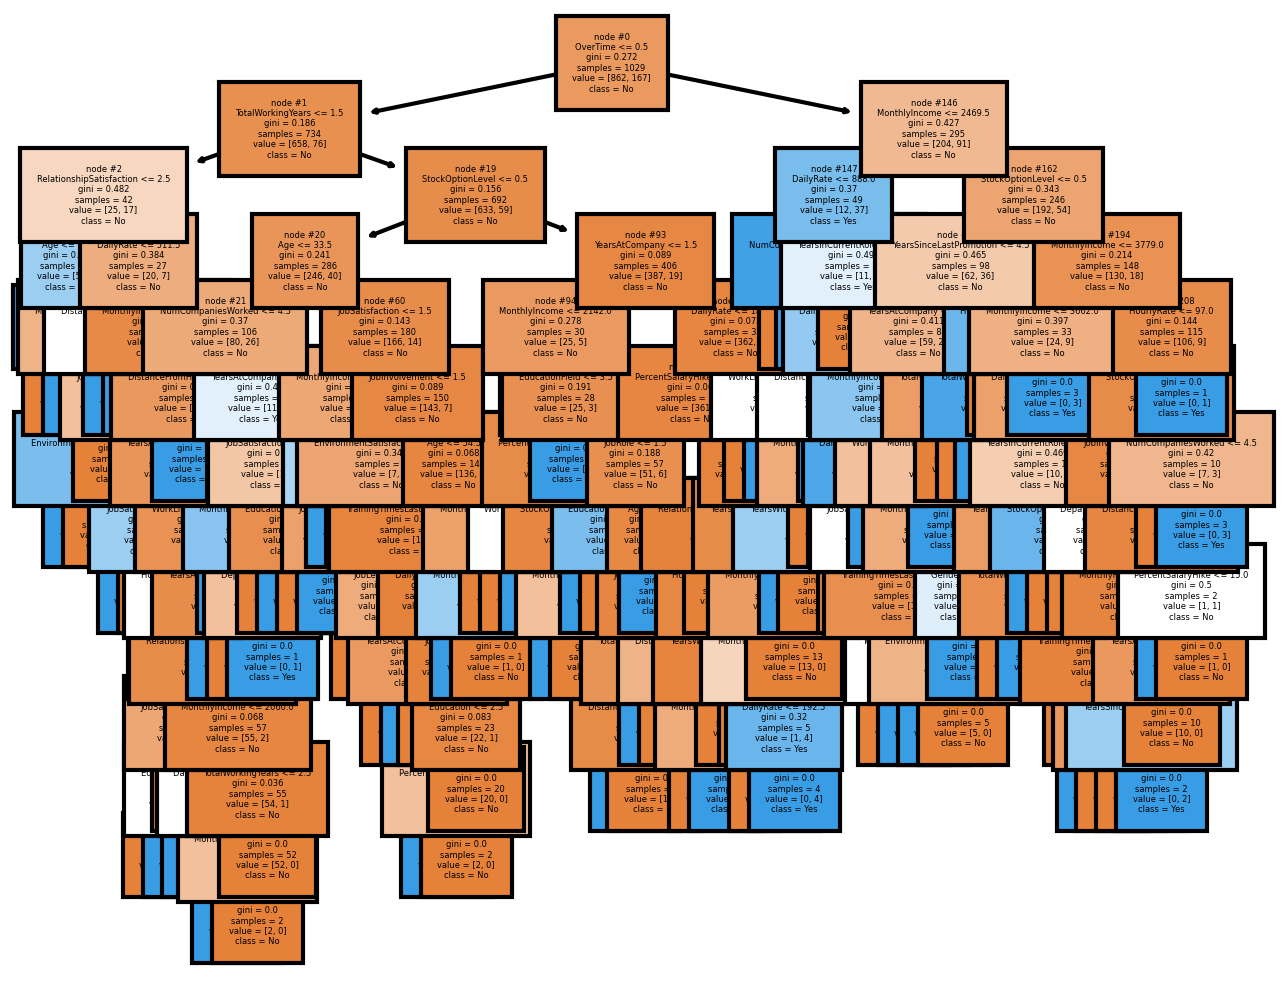

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

churn = ['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [24]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

Attrition  Age  DailyRate  DistanceFromHome  Education  \
109           0   22        534                15          3   
1282          0   33        867                 8          4   
618           0   25        180                 2          1   
471           0   38       1495                10          3   
244           0   45        252                 1          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
109                         2          59               3         1   
1282                        4          90               4         1   
618                         1          65               4         1   
471                         3          76               3         2   
244                         3          70               4         5   

      JobSatisfaction  ...  YearsWithCurrManager  BusinessTravel  Department  \
109                 4  ...                   0.0               2           1   
1282                1  ...                   6.0               2           1   
618                 1  ...                   1.0               2           1   
471                 3  ...                   0.0               2           1   
244                 4  ...                   7.0               2           1   

      EducationField  Gender  JobRole  MaritalStatus  Over18  OverTime  \
109                3       0        2              2       0         0   
1282               1       1        6              1       0         0   
618                3       1        6              2       0         0   
471                3       0        0              1       0         0   
244                4       1        3              1       0         0   

      Predicted  
109           0  
1282          0  
618           0  
471           0  
244           0  

[5 rows x 34 columns]

# Step 7 : Model Performance Metrics

In [25]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Attrition'])
print(matrix)

[[862   0]
 [  0 167]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       862
           1       1.00      1.00      1.00       167

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



### Model Improvement by Pruning Method ( Cut Tree)

In [27]:
params = { 'min_samples_split': [20,30,50], ## Parent 
           'min_samples_leaf':[20,50,40] , ## Child or Leave 
           'max_depth':[3,4,5]}  # Branches

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [20, 50, 40],
                         'min_samples_split': [20, 30, 50]},
             verbose=1)

In [29]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=20,
                       random_state=42)

In [30]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=20, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=20)

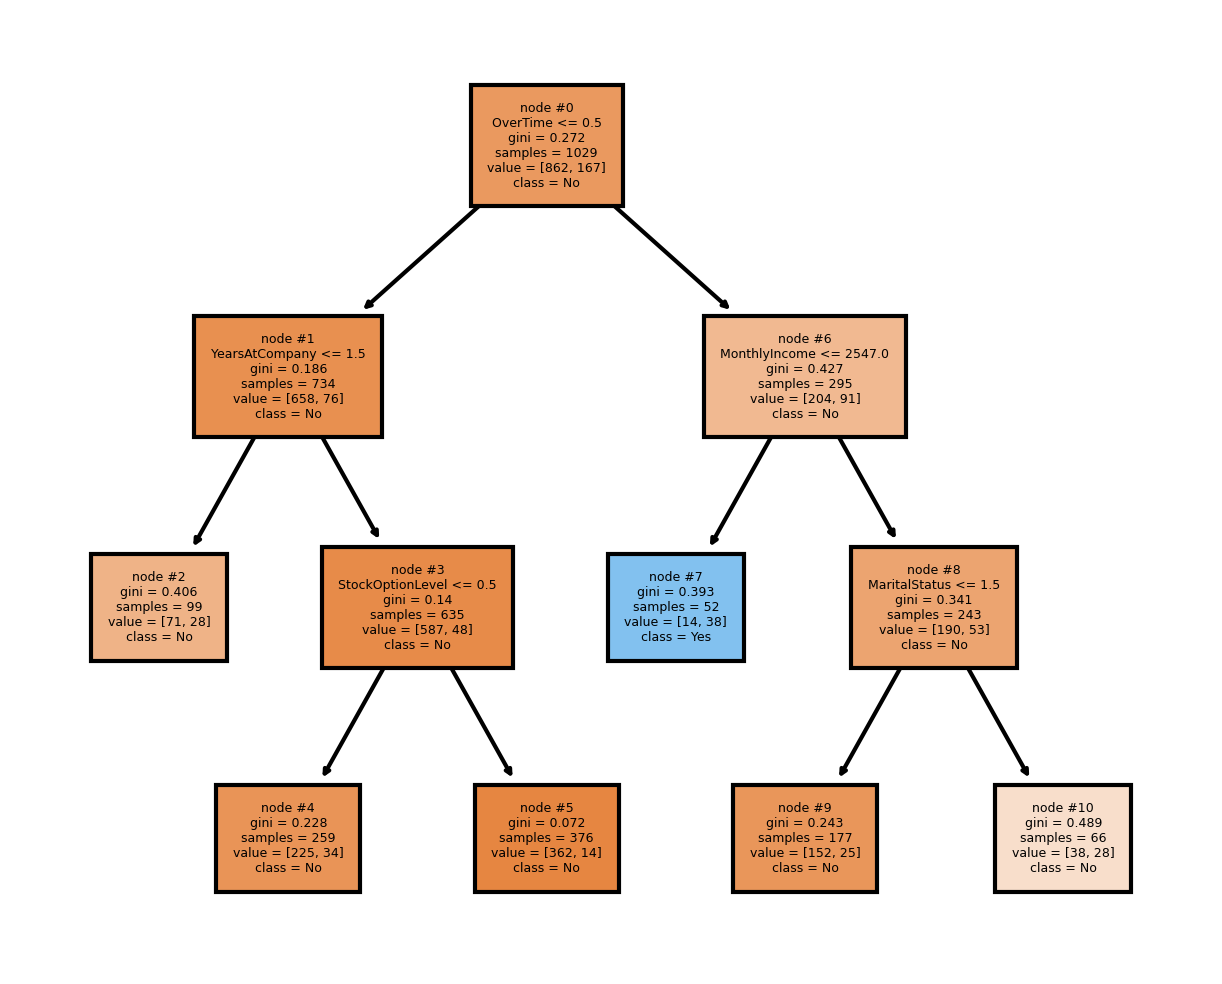

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 

In [32]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

Attrition  Age  DailyRate  DistanceFromHome  Education  \
109           0   22        534                15          3   
1282          0   33        867                 8          4   
618           0   25        180                 2          1   
471           0   38       1495                10          3   
244           0   45        252                 1          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
109                         2          59               3         1   
1282                        4          90               4         1   
618                         1          65               4         1   
471                         3          76               3         2   
244                         3          70               4         5   

      JobSatisfaction  ...  YearsWithCurrManager  BusinessTravel  Department  \
109                 4  ...                   0.0               2           1   
1282                1  ...                   6.0               2           1   
618                 1  ...                   1.0               2           1   
471                 3  ...                   0.0               2           1   
244                 4  ...                   7.0               2           1   

      EducationField  Gender  JobRole  MaritalStatus  Over18  OverTime  \
109                3       0        2              2       0         0   
1282               1       1        6              1       0         0   
618                3       1        6              2       0         0   
471                3       0        0              1       0         0   
244                4       1        3              1       0         0   

      Predicted  
109           0  
1282          0  
618           0  
471           0  
244           0  

[5 rows x 34 columns]

#### Final accuracy of Model after Pruning 

In [33]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Attrition'])
print(matrix)

[[848 129]
 [ 14  38]]


* my data is imbalance
* over sampling

In [35]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       862
           1       0.73      0.23      0.35       167

    accuracy                           0.86      1029
   macro avg       0.80      0.61      0.63      1029
weighted avg       0.85      0.86      0.83      1029



# Sensitivity & Specificity

train

In [36]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       862
           1       0.73      0.23      0.35       167

    accuracy                           0.86      1029
   macro avg       0.80      0.61      0.63      1029
weighted avg       0.85      0.86      0.83      1029



#test

In [37]:
test = pd.concat([y_test,X_test],axis=1)
test.head()

Attrition  Age  DailyRate  DistanceFromHome  Education  \
453          1   26        426                17          4   
266          0   31       1463                23          3   
237          0   52        771                 2          4   
649          0   53        102                23          4   
752          1   36        885                16          4   

     EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
453                        2          58               3         1   
266                        2          64               2         2   
237                        1          79               2         5   
649                        4          72               3         4   
752                        3          43               4         1   

     JobSatisfaction  ...  YearsSinceLastPromotion  YearsWithCurrManager  \
453                3  ...                      1.0                   0.0   
266                4  ...                      7.0                   8.0   
237                3  ...                      7.5                  12.0   
649                4  ...                      3.0                   8.0   
752                1  ...                      7.5                  14.0   

     BusinessTravel  Department  EducationField  Gender  JobRole  \
453               1           0               1       0        1   
266               2           1               3       1        0   
237               0           2               1       1        3   
649               2           1               1       0        5   
752               2           1               1       0        2   

     MaritalStatus  Over18  OverTime  
453              0       0         1  
266              1       0         0  
237              2       0         1  
649              2       0         0  
752              2       0         0  

[5 rows x 33 columns]

In [38]:
test['Predicted'] = dt.predict(X_test)  # MODEL = dt
test.head()

Attrition  Age  DailyRate  DistanceFromHome  Education  \
453          1   26        426                17          4   
266          0   31       1463                23          3   
237          0   52        771                 2          4   
649          0   53        102                23          4   
752          1   36        885                16          4   

     EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
453                        2          58               3         1   
266                        2          64               2         2   
237                        1          79               2         5   
649                        4          72               3         4   
752                        3          43               4         1   

     JobSatisfaction  ...  YearsWithCurrManager  BusinessTravel  Department  \
453                3  ...                   0.0               1           0   
266                4  ...                   8.0               2           1   
237                3  ...                  12.0               0           2   
649                4  ...                   8.0               2           1   
752                1  ...                  14.0               2           1   

     EducationField  Gender  JobRole  MaritalStatus  Over18  OverTime  \
453               1       0        1              0       0         1   
266               3       1        0              1       0         0   
237               1       1        3              2       0         1   
649               1       0        5              2       0         0   
752               1       0        2              2       0         0   

     Predicted  
453          0  
266          0  
237          0  
649          0  
752          0  

[5 rows x 34 columns]

In [39]:
from sklearn.metrics import classification_report
print(classification_report(test['Attrition'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       371
           1       0.55      0.16      0.24        70

    accuracy                           0.85       441
   macro avg       0.70      0.57      0.58       441
weighted avg       0.81      0.85      0.81       441



* Accuracy of  Model is 85%,Hence Model Performance is good Fit on test Data
* Accuracy of Bad Customer Capture by Model is 16% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 98% (Specificity)